# Distributions

### Preamble

In [80]:
SYS_PATH = r'C:/Users/mark/Documents/GitHub/honours/dev/package/'
SAVE_PATH = r"C:/Users/mark/Documents/GitHub/honours/submissions/thesis-original"
LOAD_PATH = r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/temp/output.db"

In [81]:
#standard imports
import sys
import numpy as np
import scipy.stats as stats
import pandas as pd
from datetime import date, timedelta
from collections import OrderedDict
import math
from itertools import chain
from datetime import date
from datetime import datetime

#third party imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as tkr
import seaborn as sns
from sklearn import metrics

In [82]:
import importlib
import sys; sys.path.append(SYS_PATH)
import analysis.helper as helper
import analysis.autoVC2 as vc
importlib.reload(helper)
importlib.reload(vc)
%matplotlib inline

In [126]:
TINY_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE  = 12, 16, 18, 30
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_palette("colorblind")
rcParams['font.family'] = 'serif' 
rcParams['font.serif'] = 'CMU Serif' 
rcParams['font.weight'] = 'bold'
rcParams['font.size'] = SMALL_SIZE #default font size
rcParams['axes.titlesize'] =SMALL_SIZE   # fontsize of the axes title
rcParams['axes.labelsize'] =MEDIUM_SIZE    # fontsize of the x and y labels
rcParams['xtick.labelsize'] =SMALL_SIZE    # fontsize of the tick labels
rcParams['ytick.labelsize'] =SMALL_SIZE   # fontsize of the tick labels
rcParams['legend.fontsize'] =SMALL_SIZE    # legend fontsize
rcParams['figure.titlesize'] =BIGGER_SIZE  # fontsize of the figure title
rcParams['figure.figsize'] = (8,3)
pd.set_option('precision',3)
outline_bars = dict(linewidth = 1.25, edgecolor = '.15')

In [84]:
def load_data(path=LOAD_PATH):
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    return data

### Distribution of features by company

In [85]:
reload = True

In [86]:
chart_id = "figures/design/sparsity_features"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [87]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [88]:
try:
    if reload: X = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X.to_pickle(pickle_path)

In [89]:
available_features = len(list(X)) - X.isnull().sum(axis=1)
observations = len(X) - X.isnull().sum(axis=0)

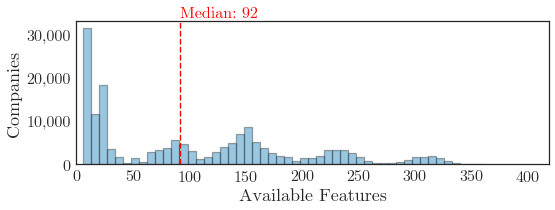

In [90]:
f = plt.figure()
ax = sns.distplot(available_features, kde=False, norm_hist=False, hist_kws = outline_bars)
ax.set_xlim(xmin=0, xmax=len(observations))
helper.add_vertical_line(ax, np.median(available_features), "Median: {:,.0f}".format(np.median(available_features)), color="r")
helper.format_axis_ticks(f, axis="y", fmt="{:,}")
ax.set_xlabel("Available Features")
ax.set_ylabel("Companies")
plt.tight_layout()

In [91]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Distribution of observations by feature

In [92]:
reload = True

In [93]:
chart_id = "figures/design/sparsity_observations"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [94]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [95]:
try:
    if reload: X = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X.to_pickle(pickle_path)

In [96]:
available_features = len(list(X)) - X.isnull().sum(axis=1)
observations = len(X) - X.isnull().sum(axis=0)

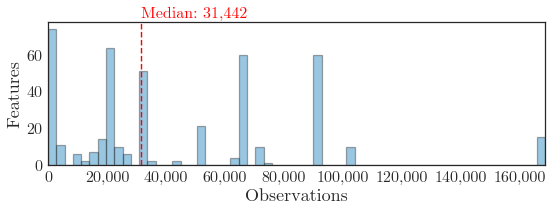

In [97]:
f = plt.figure()
ax = sns.distplot(observations, bins=60, kde=False, hist_kws = outline_bars)
ax.set_xlim(xmin=0, xmax=len(available_features))
helper.add_vertical_line(ax, np.median(observations), "Median: {:,.0f}".format(np.median(observations)), color="r")
helper.format_axis_ticks(f, axis="x", fmt="{:,}")
ax.set_xlabel("Observations")
ax.set_ylabel("Features")
plt.tight_layout()

In [98]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Distribution of skew by feature

In [99]:
reload = True

In [100]:
chart_id = "figures/design/distribution_skew"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [101]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [102]:
try:
    if reload: skews = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X = X.sample(1000)
    skews = X.apply(lambda x: stats.skew(x.dropna())).dropna()
    skews.to_pickle(pickle_path)

In [103]:
skews = skews[(skews >= -20) & (skews < 40)]

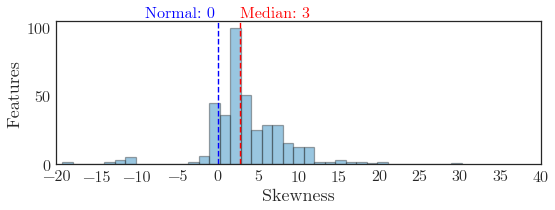

In [104]:
f = plt.figure()
ax = sns.distplot(skews, kde=False, hist_kws = outline_bars)
ax.set_xlim(xmin=-20, xmax=40)
ax.xaxis.set_major_locator(tkr.MultipleLocator(5))
helper.add_vertical_line(ax, 0, "Normal: 0", color="b", adj=0.15)
helper.add_vertical_line(ax, np.median(skews), "Median: {:,.0f}".format(np.median(skews)), color="r")
ax.set_xlabel("Skewness")
ax.set_ylabel("Features")
plt.tight_layout()

In [105]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Distribution of kurtosis by feature

In [106]:
reload = True

In [107]:
chart_id = "figures/design/distribution_kurtosis"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [108]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [109]:
try:
    if reload: kurtoses = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X = X.sample(1000)
    kurtoses = X.apply(lambda x: stats.kurtosis(x.dropna())).dropna()
    kurtoses.to_pickle(pickle_path)

In [110]:
kurtoses = kurtoses[(kurtoses >= -25) & (kurtoses < 200)]

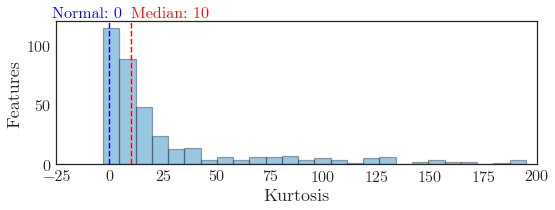

In [111]:
f = plt.figure()
ax = sns.distplot(kurtoses, kde=False, hist_kws = outline_bars)
ax.set_xlim(xmin=-25, xmax=200)
ax.xaxis.set_major_locator(tkr.MultipleLocator(25))
helper.add_vertical_line(ax, 0, "Normal: 0", color="b", adj=0.12)
helper.add_vertical_line(ax, np.median(kurtoses), "Median: {:,.0f}".format(np.median(kurtoses)), color="r")
ax.set_xlabel("Kurtosis")
ax.set_ylabel("Features")
plt.tight_layout()

In [112]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Distribution of interquartile ranges

In [113]:
reload = True

In [114]:
chart_id = "figures/design/distribution_ranges"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [115]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [116]:
try:
    if reload: iqrs = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X = X.sample(1000)
    iqrs = X.apply(lambda x: stats.iqr(x.dropna())).dropna()
    iqrs.to_pickle(pickle_path)

In [117]:
iqrs = np.log1p(iqrs)
iqrs = iqrs[(iqrs >= 0) & (iqrs < 25)]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


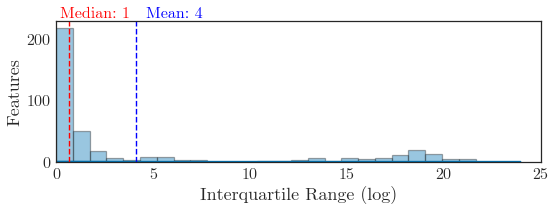

In [118]:
f = plt.figure()
ax = sns.distplot(iqrs, hist_kws = outline_bars)
ax.set_xlim(xmin=0, xmax=25)
helper.add_vertical_line(ax, np.mean(iqrs), "Mean: {:,.0f}".format(np.mean(iqrs)), color="b", adj=-0.02)
helper.add_vertical_line(ax, np.median(iqrs), "Median: {:,.0f}".format(np.median(iqrs)), color="r", adj=0.02)
ax.set_xlabel("Interquartile Range (log)")
ax.set_ylabel("Features")
plt.tight_layout()

In [119]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Distribution of intercorrelations

In [120]:
reload = True

In [121]:
chart_id = "figures/design/distribution_orthogonality"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [122]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [123]:
def develop_corrs(X):
    thresholds = [x*.1 for x in range(10)]
    pearson = {x: pd.DataFrame(np.where(abs(X.corr(method="pearson").stack()) >= x, True, False)).stack().value_counts(normalize=True)[True]*100 for x in thresholds}
    pearson = pd.DataFrame.from_dict(data=pearson, orient="index")
    pearson["Method"] = "Pearson"
    spearman = {x: pd.DataFrame(np.where(abs(X.corr(method="spearman").stack()) >= x, True, False)).stack().value_counts(normalize=True)[True]*100 for x in thresholds}
    spearman = pd.DataFrame.from_dict(data=spearman, orient="index")
    spearman["Method"] = "Spearman"
    corrs = pd.concat([spearman, pearson], axis=0)
    corrs = corrs.drop(0.0)
    return corrs

In [124]:
try:
    if reload: corrs = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X = X.sample(1000)
    corrs = develop_corrs(X)
    corrs.to_pickle(pickle_path)

AttributeError: Unknown property normed

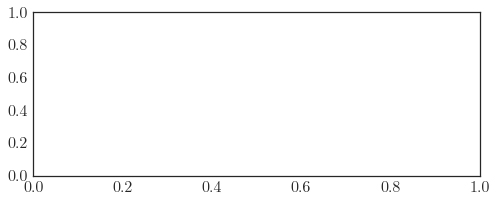

In [125]:
f = plt.figure()
ax = sns.barplot(x=corrs.index, y=corrs[0], hue=corrs["Method"], **outline_bars)
helper.auto_label(ax, fmt='{:,.0f}',size=SMALL_SIZE)
ax.set_xlabel("Correlation Cutoff (Absolute)")
ax.set_ylabel("Intercorrelations\nabove Cutoff (%)")
plt.tight_layout()

In [140]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Distribution of central tendency

In [127]:
reload = True

In [128]:
chart_id = "figures/design/distribution_central_tendency"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [129]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [130]:
try:
    if reload: X = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X = X.sample(1000)
    X.to_pickle(pickle_path)

In [131]:
means = X.apply(lambda x: np.mean(x.dropna())).dropna()
means = np.log1p(means)
medians = X.apply(lambda x: np.median(x.dropna())).dropna()
medians = np.log1p(medians)
modes = X.apply(helper.get_mode).dropna()
modes = np.log1p(np.absolute(modes))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log1p
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in log1p


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


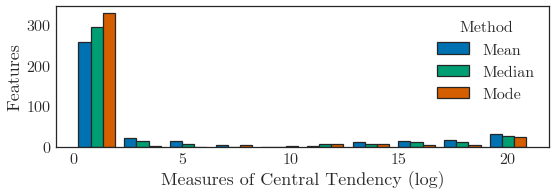

In [132]:
f = plt.figure()
plt.hist([means, medians, modes],label=["Mean","Median","Mode"], **outline_bars)
plt.xlabel("Measures of Central Tendency (log)")
plt.ylabel("Features")
plt.legend(title="Method")
plt.tight_layout()

In [133]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Distribution of funding raised transformed

In [134]:
reload = True

In [135]:
chart_id = "figures/design/distribution_funding_transformed"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [136]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [137]:
try:
    if reload: X = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X.to_pickle(pickle_path)

In [138]:
from sklearn.preprocessing import Imputer
X = X.dropna(axis=1, how = "all")
imp = Imputer(strategy="median")
X_imp = imp.fit_transform(X)
X_imp = pd.DataFrame(X_imp, index=X.index, columns=list(X))
X_pos = X_imp.subtract(X_imp.min(axis=0))

In [139]:
funding = pd.to_numeric(X_pos["confidence_validation_funding_raised_value_total_number"],errors="coerce")
log1p = pd.DataFrame(np.log1p(funding), index=X_pos.index)
sqrt = pd.DataFrame(funding**(1/2), index=X_pos.index)
funding = funding.to_frame()
funding["Method"] = "None"
log1p["Method"] = "Log1P"
sqrt["Method"] = "SQRT"
transforms = pd.concat([funding,log1p,sqrt],axis=0)
funding = transforms["confidence_validation_funding_raised_value_total_number"]
funding.name = "Funding Raised"

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


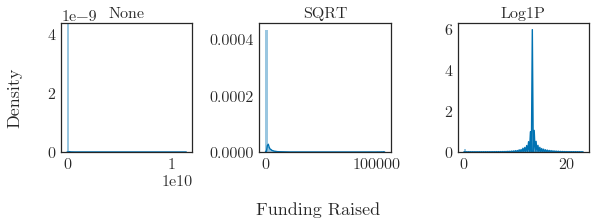

In [140]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

sns.distplot(funding[transforms["Method"] == "None"],ax=ax1)
ax1.set_title("None")
ax1.xaxis.label.set_visible(False)

sns.distplot(funding[transforms["Method"] == "SQRT"],ax=ax2)
ax2.set_title("SQRT")
ax2.xaxis.label.set_visible(False)

sns.distplot(funding[transforms["Method"] == "Log1P"],ax=ax3)
ax3.set_title("Log1P")
ax3.xaxis.label.set_visible(False)

f.text(0.5, -0.04, 'Funding Raised', size= MEDIUM_SIZE, ha='center')
f.text(-0.04, 0.5, 'Density', va='center', size= MEDIUM_SIZE, rotation='vertical')
plt.tight_layout()

In [141]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Distribution of eigenvalues from PCA

In [142]:
reload = True

In [143]:
chart_id = "figures/design/distribution_eigenvalues"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [144]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [145]:
try:
    if reload: X = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X.to_pickle(pickle_path)

In [146]:
from sklearn.preprocessing import Imputer
X = X.dropna(axis=1, how = "all")
imp = Imputer(strategy="median")
X_imp = imp.fit_transform(X)
X_imp = pd.DataFrame(X_imp, index=X.index, columns=list(X))
X_pos = X_imp.subtract(X_imp.min(axis=0))
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.log1p)
X_tf = ft.fit_transform(X_pos)
X_tf = pd.DataFrame(X_tf, index=X_pos.index, columns=list(X_pos))
from sklearn.preprocessing import scale
X_std = scale(X_tf)
X_std = pd.DataFrame(X_std, index=X_tf.index, columns=list(X_tf))
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)

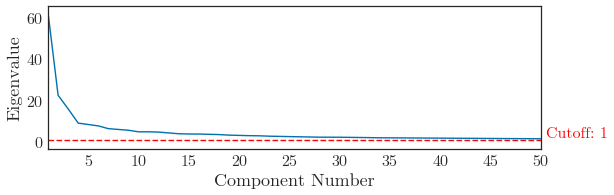

In [147]:
f = plt.figure()
plt.plot(np.arange(len(list(X_std))) + 1, pca.explained_variance_)
ax = plt.gca()
ax.xaxis.set_major_locator(tkr.MultipleLocator(5))
ax.set_ylabel("Eigenvalue")
ax.set_xlabel("Component Number")
helper.add_horizontal_line(ax, 1, "Cutoff: 1", color="r")
ax.set_xlim(1,50)
plt.tight_layout()

In [148]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Inter-correlations of factors from framework

In [176]:
reload = False

In [177]:
chart_id = "figures/design/distribution_correlations_grouped"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [178]:
def get_data():
    data = vc.prepare_dataset(
        SYS_PATH + "analysis/input/master.db", date(2016, 9, 9),
        SYS_PATH + "analysis/config/master_feature.sql", "feature",
        SYS_PATH + "analysis/output/temp/", alt=True)
    data = vc.add_stages(data)
    data = vc.apply_constraints(data)
    return data

In [179]:
try:
    if reload: X = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    X = vc.filter_features(data)
    X.to_pickle(pickle_path)

logManager - INFO - prepare_dataset | Started
logManager - INFO - prepare_dataset | Passed | 24.65
logManager - INFO - add_stages | Started
logManager - INFO - add_stages | Passed | 43.95
logManager - INFO - apply_constraints | Started
logManager - INFO - apply_constraints | Passed | 32.75
logManager - INFO - filter_features | Started
logManager - INFO - filter_features | Passed | 3.24


In [180]:
from sklearn.preprocessing import Imputer
X = X.dropna(axis=1, how = "all")
imp = Imputer(strategy="median")
X_imp = imp.fit_transform(X)
X_imp = pd.DataFrame(X_imp, index=X.index, columns=list(X))
X_pos = X_imp.subtract(X_imp.min(axis=0))
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.log1p)
X_tf = ft.fit_transform(X_pos)
X_tf = pd.DataFrame(X_tf, index=X_pos.index, columns=list(X_pos))
from sklearn.preprocessing import scale
X_std = scale(X_tf)
X_std = pd.DataFrame(X_std, index=X_tf.index, columns=list(X_tf))

In [202]:
from collections import defaultdict
from itertools import combinations

features = list(X_std)
f_map = {x:x.split("_")[2] for x in features}
f_group = defaultdict(list)
for f,g in f_map.items():
    f_group[g].append(f)
agg_group = {}
for g,l in f_group.items():
    combo = combinations(l, 2)
    for x,y in combo:
        corr = stats.spearmanr(X_std[x][:100], X_std[y][:100])[0]
        if corr < 0: X_std[y] *= -1
    tot = X_std[l].sum(axis=1)
    agg_group[g] = tot
X_grp = pd.DataFrame(agg_group)
X_grp = X_grp[["founders", "advisors", "executives", "events", "patents", "funding", "investors", "customers", "industry", "location", "economy"]]
grp_corr = X_grp.corr(method="spearman")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


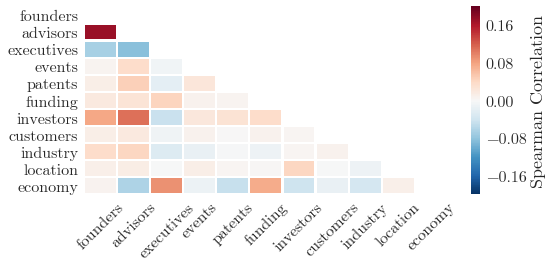

In [207]:
f = plt.figure(figsize=(8,4))
mask = np.zeros_like(grp_corr)
mask[np.triu_indices_from(mask)] = True
#f_names = [x.split("_")[2] for x in list(X_grp)]
ax = sns.heatmap(grp_corr,square=False, mask=mask, robust=True, vmax = 0.2,  **outline_bars)
ax.collections[0].colorbar.set_label("Spearman Correlation")
plt.xticks(rotation=45)
plt.tight_layout()

In [208]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")